In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [197]:
# 1. Load the data
df = pd.read_csv("data/bank-additional/bank-additional/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [198]:
# 2. Inspect the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [199]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [200]:
df.replace("unknown", np.nan, inplace=True)

In [201]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [202]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [203]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [204]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

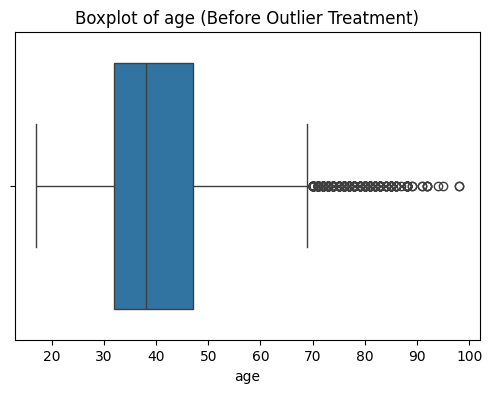

In [205]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["age"])
plt.title(f"Boxplot of {"age"} (Before Outlier Treatment)")
plt.xlabel("age")
plt.show()

In [206]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["age"] >= lower_bound) & (df["age"] <= upper_bound)]

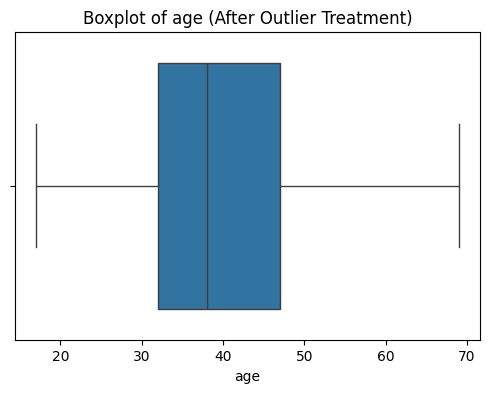

In [207]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["age"])
plt.title(f"Boxplot of {"age"} (After Outlier Treatment)")
plt.xlabel("age")
plt.show()

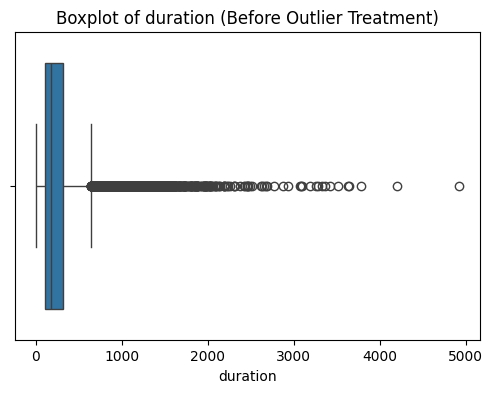

In [208]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["duration"])
plt.title(f"Boxplot of {"duration"} (Before Outlier Treatment)")
plt.xlabel("duration")
plt.show()

In [209]:
Q1 = df["duration"].quantile(0.25)
Q3 = df["duration"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["duration"] >= lower_bound) & (df["duration"] <= upper_bound)]

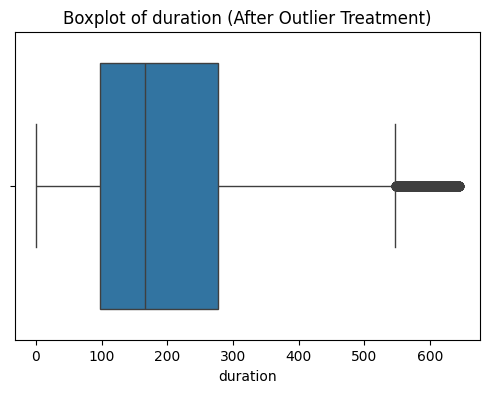

In [210]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["duration"])
plt.title(f"Boxplot of {"duration"} (After Outlier Treatment)")
plt.xlabel("duration")
plt.show()

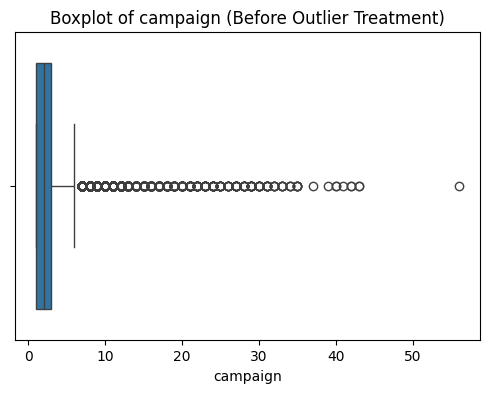

In [211]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["campaign"])
plt.title(f"Boxplot of {"campaign"} (Before Outlier Treatment)")
plt.xlabel("campaign")
plt.show()

In [212]:
Q1 = df["campaign"].quantile(0.25)
Q3 = df["campaign"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["campaign"] >= lower_bound) & (df["campaign"] <= upper_bound)]

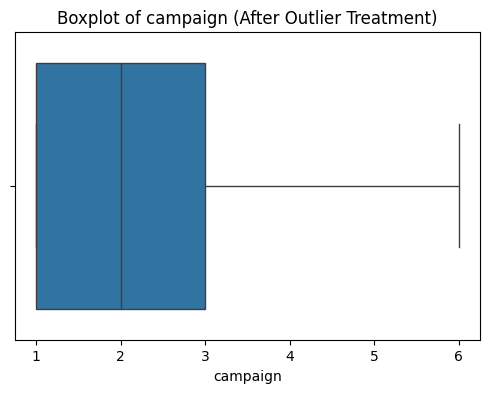

In [213]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["campaign"])
plt.title(f"Boxplot of {"campaign"} (After Outlier Treatment)")
plt.xlabel("campaign")
plt.show()

In [214]:
print("DataFrame shape before one-hot encoding:", df.shape)

nominal_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print("DataFrame shape after one-hot encoding:", df.shape)


DataFrame shape before one-hot encoding: (35535, 21)
DataFrame shape after one-hot encoding: (35535, 43)


In [215]:
unique_values = df["education"].unique()
print(unique_values)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']


In [216]:
education_order = {
    "illiterate": 0,
    "basic.4y": 1,
    "basic.6y": 2,
    "basic.9y": 3,
    "high.school": 4,
    "professional.course": 5,
    "university.degree": 6
}

df['education'] = df["education"].map(education_order)

print("Unique values in 'education' after mapping:", df['education'].unique())

Unique values in 'education' after mapping: [1 4 2 3 5 6 0]


In [217]:
df.isnull().sum()

age                     0
education               0
duration                0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
y                       0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
contact_telephone       0
month_aug               0
month_dec               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov               0
month_oct               0
month_sep               0
day_of_week_mon         0
day_of_week_

In [218]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [219]:
df_before_scaling = df[num_cols].copy()

In [220]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

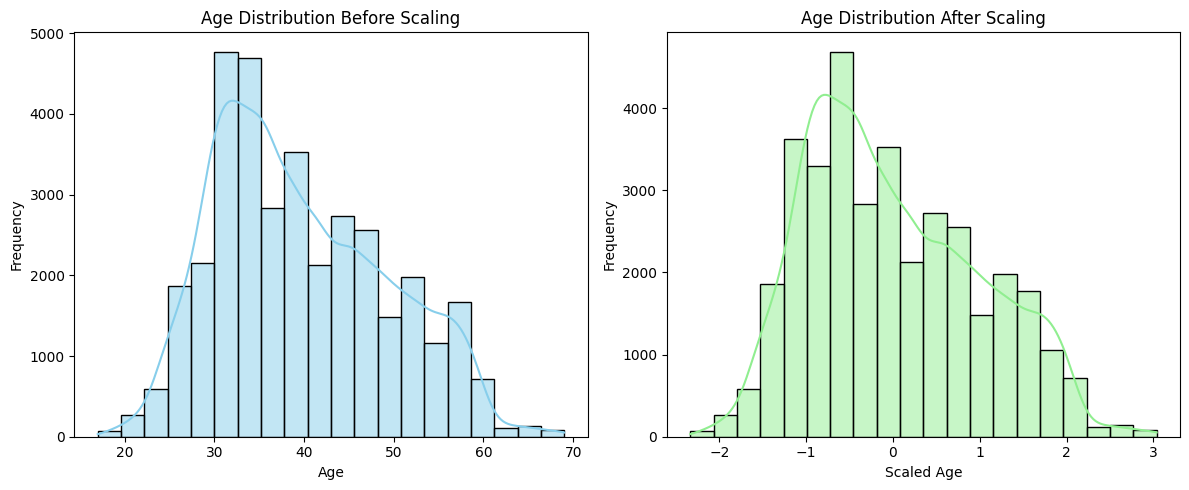

In [221]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_before_scaling['age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution Before Scaling')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_scaled['age'], bins=20, kde=True, color='lightgreen', edgecolor='black')
plt.title('Age Distribution After Scaling')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

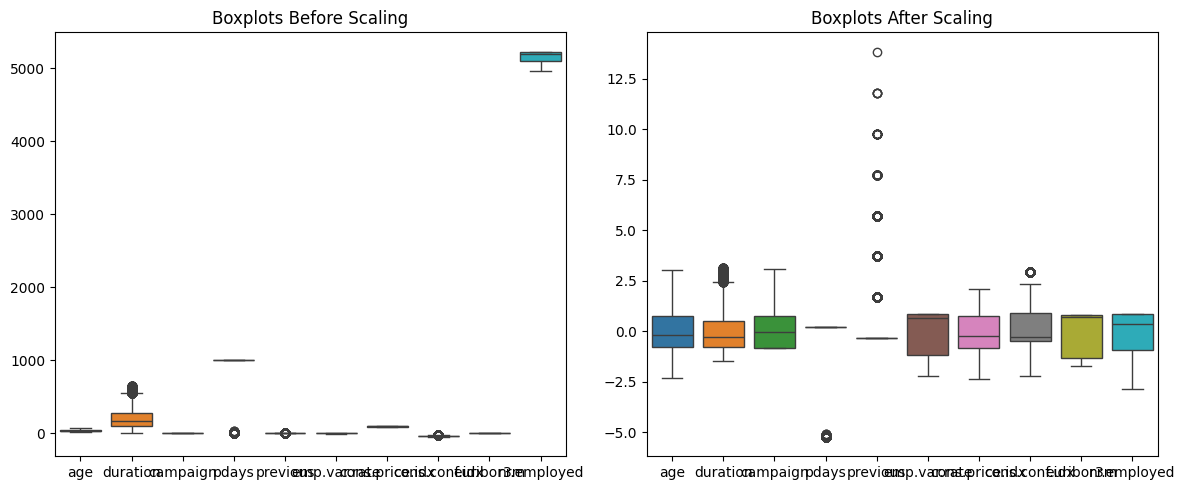

In [222]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_before_scaling)
plt.title('Boxplots Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled[num_cols])
plt.title('Boxplots After Scaling')

plt.tight_layout()
plt.show()

In [223]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
X = df.drop('y', axis=1)
y = df['y']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [226]:
print("=== Support Vector Machine (SVM) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

=== Support Vector Machine (SVM) ===
Accuracy: 0.9278176445757703
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6513
           1       0.67      0.27      0.39       594

    accuracy                           0.93      7107
   macro avg       0.80      0.63      0.68      7107
weighted avg       0.91      0.93      0.91      7107



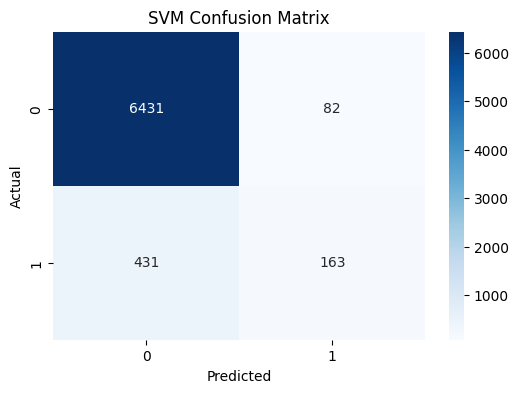

In [227]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [228]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


C:\Users\Nimna Kaveesha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


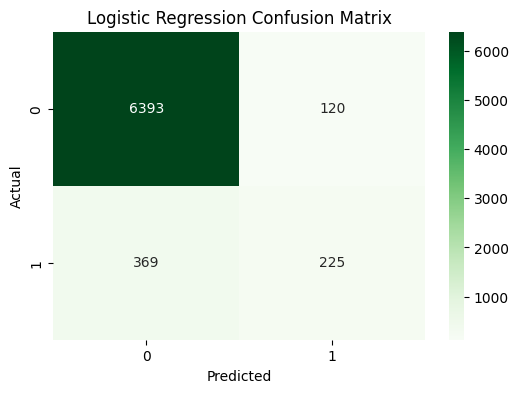

In [229]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [232]:
joblib.dump(lr_model, "model.pkl")
joblib.dump(svm_model, "preprocessor.pkl")

['preprocessor.pkl']